In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/train/green.zip

unzip:  cannot find or open /content/drive/MyDrive/train/green.zip, /content/drive/MyDrive/train/green.zip.zip or /content/drive/MyDrive/train/green.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/train/red.zip

unzip:  cannot find or open /content/drive/MyDrive/train/red.zip, /content/drive/MyDrive/train/red.zip.zip or /content/drive/MyDrive/train/red.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/validation/Green.zip

unzip:  cannot find or open /content/drive/MyDrive/validation/Green.zip, /content/drive/MyDrive/validation/Green.zip.zip or /content/drive/MyDrive/validation/Green.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/validation/Red.zip

Archive:  /content/drive/MyDrive/validation/Red.zip
  inflating: Red/Image-0.jpg         
  inflating: Red/Image-1.jpg         
  inflating: Red/Image-10.jpg        
  inflating: Red/Image-100.jpg       
  inflating: Red/Image-101.jpg       
  inflating: Red/Image-102.jpg       
  inflating: Red/Image-103.jpg       
  inflating: Red/Image-104.jpg       
  inflating: Red/Image-105.jpg       
  inflating: Red/Image-106.jpg       
  inflating: Red/Image-107.jpg       
  inflating: Red/Image-108.jpg       
  inflating: Red/Image-109.jpg       
  inflating: Red/Image-11.jpg        
  inflating: Red/Image-110.jpg       
  inflating: Red/Image-111.jpg       
  inflating: Red/Image-112.jpg       
  inflating: Red/Image-113.jpg       
  inflating: Red/Image-114.jpg       
  inflating: Red/Image-115.jpg       
  inflating: Red/Image-116.jpg       
  inflating: Red/Image-117.jpg       
  inflating: Red/Image-118.jpg       
  inflating: Red/Image-119.jpg       
  inflating: Red/Image-12.jpg       

In [ ]:
import zipfile
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_dir="/content/train"
val_dir="/content/validation"

Found 2802 images belonging to 2 classes.
Found 300 images belonging to 3 classes.


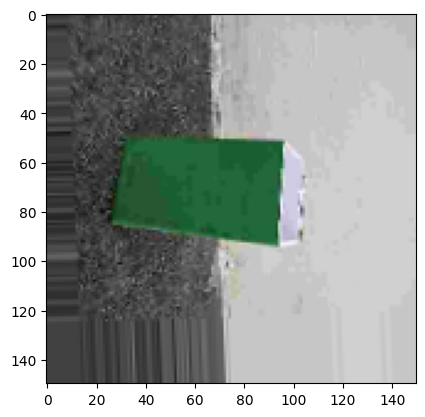

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   validation_split=0.3)
train_generator = train_datagen.flow_from_directory(train_dir,
                                  target_size=(150, 150),
                                  class_mode="binary",
                                  batch_size=16,
                                  subset="training"
                             )
validation_generator = train_datagen.flow_from_directory(
                                  val_dir,
                                  target_size=(150, 150),
                                  class_mode="binary",
                                  batch_size=16,
                                  subset="validation"
)

x_val, y_val = validation_generator.next()

# Display a single image from the validation data
plt.imshow(x_val[0])
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    # layers.Conv2D(64, kernel_size=3, activation="relu"),
    # layers.MaxPooling2D(2, 2),
    # layers.Conv2D(128, kernel_size=3, activation="relu"),
    # layers.MaxPooling2D(2, 2),
    # layers.Conv2D(128, kernel_size=3, activation="relu"),
    # layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 82944)            

In [ ]:
from tensorflow import keras
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs["accuracy"] is not None and logs["val_accuracy"] >= 0.99:
            print("Training is finished...")


In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=5)


Epoch 1/5
176/176 [==============================] - 33s 174ms/step - loss: 0.1319 - accuracy: 0.9775 - val_loss: -1.9511 - val_accuracy: 0.0000e+00
Epoch 2/5
176/176 [==============================] - 34s 191ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: -8.6918 - val_accuracy: 0.0000e+00
Epoch 3/5
176/176 [==============================] - 31s 178ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: -3.1748 - val_accuracy: 0.0000e+00
Epoch 4/5
176/176 [==============================] - 31s 174ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: -4.3760 - val_accuracy: 0.0000e+00
Epoch 5/5
176/176 [==============================] - 31s 177ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: -3.5075 - val_accuracy: 0.0000e+00


Calculating the accuracy
Calculating the loss
The results are being visualized


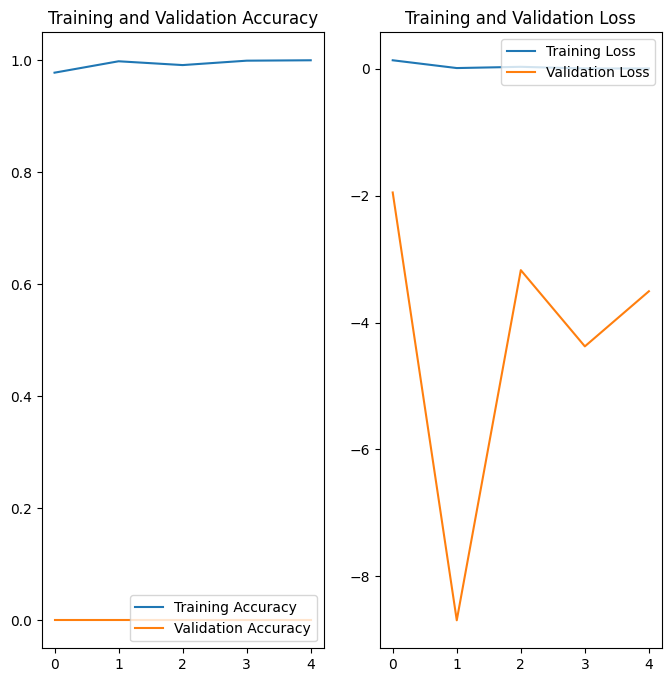

In [ ]:
epochs=5
print("Calculating the accuracy")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Calculating the loss")
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
print("The results are being visualized")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img=x_val[0]
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
import numpy as np
img = np.reshape(x_val[10], (1,150, 150, 3))
img=img/255
img.shape

(1, 150, 150, 3)

In [ ]:
predictions=model.predict(img,batch_size=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(predictions)

[[8.235626e-33]]


In [ ]:
if predictions>0.2:
  print("Red")
else:
  print("Green")

Green


In [ ]:
#taking photo from cam

In [ ]:

import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
img=cv2.imread("/content/photo.jpg")
resized = cv2.resize(img, (150,150))
resized.shape

(150, 150, 3)

In [ ]:
# type(resized)


In [ ]:
# img=np.array(img)
img = np.reshape(resized, (1,150, 150, 3))
img=img/255
img.shape

(1, 150, 150, 3)

In [ ]:
predictions=model.predict(img,batch_size=1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
print(predictions)
if(predictions>0.2):
  print("green")
else:
  print("red")

[[0.36010963]]
green


In [ ]:
#for exisisting image

In [ ]:
import cv2
img=cv2.imread("/content/validation/green/Image-50.jpg")
img1=cv2.imread("/content/validation/red/Image-50.jpg")

resized = cv2.resize(img, (150,150))
resized1 = cv2.resize(img1, (150,150))
resized.shape

(150, 150, 3)

In [ ]:
# img=np.array(img)
img = np.reshape(resized, (1,150, 150, 3))
img=img/255


# img=np.array(img)
img1= np.reshape(resized1, (1,150, 150, 3))
img1=img1/255


In [ ]:
#for green image
predictions=model.predict(img,batch_size=1)
print(predictions)
if(predictions>0.1):
  print("red")
else:
  print("green")

1/1 [==============================] - 0s 17ms/step
[[4.711048e-06]]
green


In [ ]:
#for red image
predictions=model.predict(img1,batch_size=1)
print(predictions)
if(predictions>0.1):
  print("red")
else:
  print("green")

1/1 [==============================] - 0s 21ms/step
[[0.23184961]]
red
